In [9]:
from CLOGP import MGmB, calculo_S, batche, calcula_p_chapeu, calculo_accuracy, calcular_erro, sigmoid, sinal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
# carregar dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [11]:
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train_0_1, y_train_0_1 = x_train[train_filter], y_train[train_filter]
x_test_0_1, y_test_0_1 = x_test[test_filter], y_test[test_filter]

x_train_0_1, y_train_0_1 = select_first_n_per_class(x_train_0_1, y_train_0_1, 100)
x_test_0_1, y_test_0_1 = select_first_n_per_class(x_test_0_1, y_test_0_1, 100)

x_train_array = x_train_0_1.reshape((len(x_train_0_1), 784))
x_test_array = x_test_0_1.reshape((len(x_test_0_1), 784))
x_train_0_1 = x_train_array.astype('float32')
x_test_0_1 = x_test_array.astype('float32')
x_train_0_1 = np.hstack((np.ones((x_train_0_1.shape[0], 1)), x_train_0_1))
x_test_0_1 = np.hstack((np.ones((x_test_0_1.shape[0], 1)), x_test_0_1))

indices = np.random.permutation(len(x_train_0_1))
x_train_0_1 = x_train_0_1[indices]
y_train_0_1 = y_train_0_1[indices]

train_filter = np.where((y_train == 0) | (y_train == 2))
test_filter = np.where((y_test == 0) | (y_test == 2))

x_train_0_2, y_train_0_2 = x_train[train_filter], y_train[train_filter]
x_test_0_2, y_test_0_2 = x_test[test_filter], y_test[test_filter]

x_train_0_2, y_train_0_2 = select_first_n_per_class(x_train_0_2, y_train_0_2, 100)
x_test_0_2, y_test_0_2 = select_first_n_per_class(x_test_0_2, y_test_0_2, 100)

x_train_array = x_train_0_2.reshape((len(x_train_0_2), 784))
x_test_array = x_test_0_2.reshape((len(x_test_0_2), 784))
x_train_0_2 = x_train_array.astype('float32')
x_test_0_2 = x_test_array.astype('float32')
x_train_0_2 = np.hstack((np.ones((x_train_0_2.shape[0], 1)), x_train_0_2))
x_test_0_2 = np.hstack((np.ones((x_test_0_2.shape[0], 1)), x_test_0_2))
indices = np.random.permutation(len(x_train_0_2))
x_train_0_2 = x_train_0_2[indices]
y_train_0_2 = y_train_0_2[indices]


train_filter = np.where((y_train == 1) | (y_train == 2))
test_filter = np.where((y_test == 1) | (y_test == 2))

x_train_1_2, y_train_1_2 = x_train[train_filter], y_train[train_filter]
x_test_1_2, y_test_1_2 = x_test[test_filter], y_test[test_filter]

x_train_1_2, y_train_1_2 = select_first_n_per_class(x_train_1_2, y_train_1_2, 100)
x_test_1_2, y_test_1_2 = select_first_n_per_class(x_test_1_2, y_test_1_2, 100)

x_train_array = x_train_1_2.reshape((len(x_train_1_2), 784))
x_test_array = x_test_1_2.reshape((len(x_test_1_2), 784))

x_train_1_2 = x_train_array.astype('float32')
x_test_1_2 = x_test_array.astype('float32')
x_train_1_2 = np.hstack((np.ones((x_train_1_2.shape[0], 1)), x_train_1_2))
x_test_1_2 = np.hstack((np.ones((x_test_1_2.shape[0], 1)), x_test_1_2))
indices = np.random.permutation(len(x_train_1_2))
x_train_1_2 = x_train_1_2[indices]
y_train_1_2 = y_train_1_2[indices]


#0_3
train_filter = np.where((y_train == 0) | (y_train == 3))
test_filter = np.where((y_test == 0) | (y_test == 3))

x_train_0_3, y_train_0_3 = x_train[train_filter], y_train[train_filter]
x_test_0_3, y_test_0_3 = x_test[test_filter], y_test[test_filter]

x_train_0_3, y_train_0_3 = select_first_n_per_class(x_train_0_3, y_train_0_3, 100)
x_test_0_3, y_test_0_3 = select_first_n_per_class(x_test_0_3, y_test_0_3, 100)

x_train_array = x_train_0_3.reshape((len(x_train_0_3), 784))
x_test_array = x_test_0_3.reshape((len(x_test_0_3), 784))

x_train_0_3 = x_train_array.astype('float32')
x_test_0_3 = x_test_array.astype('float32')
x_train_0_3 = np.hstack((np.ones((x_train_0_3.shape[0], 1)), x_train_0_3))
x_test_0_3 = np.hstack((np.ones((x_test_0_3.shape[0], 1)), x_test_0_3))
indices = np.random.permutation(len(x_train_0_3))
x_train_0_3 = x_train_0_3[indices]
y_train_0_3 = y_train_0_3[indices]


#1_3
train_filter = np.where((y_train == 1) | (y_train == 3))
test_filter = np.where((y_test == 1) | (y_test == 3))

x_train_1_3, y_train_1_3 = x_train[train_filter], y_train[train_filter]
x_test_1_3, y_test_1_3 = x_test[test_filter], y_test[test_filter]

x_train_1_3, y_train_1_3 = select_first_n_per_class(x_train_1_3, y_train_1_3, 100)
x_test_1_3, y_test_1_3 = select_first_n_per_class(x_test_1_3, y_test_1_3, 100)

x_train_array = x_train_1_3.reshape((len(x_train_1_3), 784))
x_test_array = x_test_1_3.reshape((len(x_test_1_3), 784))

x_train_1_3 = x_train_array.astype('float32')
x_test_1_3 = x_test_array.astype('float32')
x_train_1_3 = np.hstack((np.ones((x_train_1_3.shape[0], 1)), x_train_1_3))
x_test_1_3 = np.hstack((np.ones((x_test_1_3.shape[0], 1)), x_test_1_3))
indices = np.random.permutation(len(x_train_1_3))
x_train_1_3 = x_train_1_3[indices]
y_train_1_3 = y_train_1_3[indices]

#2_3
train_filter = np.where((y_train == 2) | (y_train == 3))
test_filter = np.where((y_test == 2) | (y_test == 3))

x_train_2_3, y_train_2_3 = x_train[train_filter], y_train[train_filter]
x_test_2_3, y_test_2_3 = x_test[test_filter], y_test[test_filter]

x_train_2_3, y_train_2_3 = select_first_n_per_class(x_train_2_3, y_train_2_3, 100)
x_test_2_3, y_test_2_3 = select_first_n_per_class(x_test_2_3, y_test_2_3, 100)

x_train_array = x_train_2_3.reshape((len(x_train_2_3), 784))
x_test_array = x_test_2_3.reshape((len(x_test_2_3), 784))

x_train_2_3 = x_train_array.astype('float32')
x_test_2_3 = x_test_array.astype('float32')
x_train_2_3 = np.hstack((np.ones((x_train_2_3.shape[0], 1)), x_train_2_3))
x_test_2_3 = np.hstack((np.ones((x_test_2_3.shape[0], 1)), x_test_2_3))
indices = np.random.permutation(len(x_train_2_3))
x_train_2_3 = x_train_2_3[indices]
y_train_2_3 = y_train_2_3[indices]

y_train_0_1[y_train_0_1==0]=0
y_train_0_1[y_train_0_1==1]=1



y_train_0_2[y_train_0_2==0]=0
y_train_0_2[y_train_0_2==2]=1


y_train_1_2[y_train_1_2==2]=0
y_train_1_2[y_train_1_2==1]=1


y_train_0_3[y_train_0_3==0]=0
y_train_0_3[y_train_0_3==3]=1


y_train_1_3[y_train_1_3==1]=1
y_train_1_3[y_train_1_3==3]=0


y_train_2_3[y_train_2_3==2]=0
y_train_2_3[y_train_2_3==3]=1


c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLOGP.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLOGP.py:22: RuntimeWarning: divide by zero encountered in log
  erro += -(Y[n] * np.log(p_chapeu[n]) + (1 - Y[n]) * np.log(1 - p_chapeu[n]))
c:\Users\faust\OneDrive\Ambiente de Trabalho\MASTER\II SEMESTRE\OML\TRABALHO DE OML\CLOGP.py:22: RuntimeWarning: invalid value encountered in scalar multiply
  erro += -(Y[n] * np.log(p_chapeu[n]) + (1 - Y[n]) * np.log(1 - p_chapeu[n]))


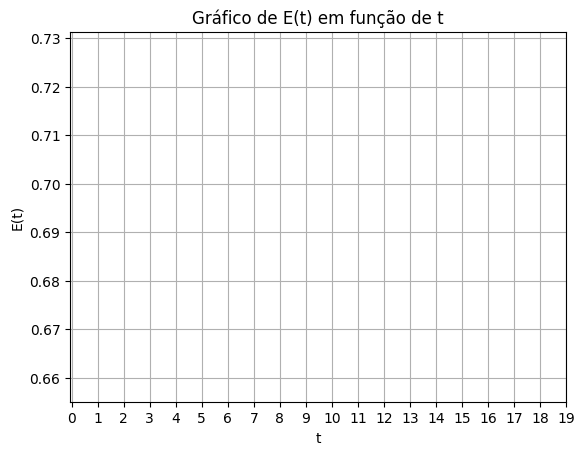

In [12]:
eta = 0.5
epochs = 20
w0 = np.zeros(785)
d=2
batch_size = len(x_train_0_1)
w_0_1, E_0_1 = MGmB(x_train_0_1, y_train_0_1, w0, eta,batch_size,epochs)




t = list(range(len(E_0_1)))
# Plotando o gráfico
plt.plot(t, E_0_1, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

previsoes = calculo_accuracy( x_test_0_1,y_test_0_1,w_0_1)

In [13]:
eta = 0.5
epochs = 20
batch_size = len(x_train_0_1)
w0 = np.zeros(785)
w_0_1, E_0_1 = MGmB(x_train_0_1, y_train_0_1, w0, eta,batch_size,epochs)
batch_size = len(x_train_0_2)
w0 = np.zeros(785)
w_0_2, E_0_2 = MGmB(x_train_0_2, y_train_0_2, w0, eta,batch_size,epochs)
batch_size = len(x_train_0_3)
w0 = np.zeros(785)
w_0_3, E_0_3 = MGmB(x_train_0_3, y_train_0_3, w0, eta,batch_size,epochs)
batch_size = len(x_train_1_2)
w0 = np.zeros(785)
w_1_2, E_1_2 = MGmB(x_train_1_2, y_train_1_2, w0, eta,batch_size,epochs)
batch_size = len(x_train_1_3)
w0 = np.zeros(785)
w_1_3, E_1_3 = MGmB(x_train_1_3, y_train_1_3, w0, eta,batch_size,epochs)
batch_size = len(x_train_2_3)
w0 = np.zeros(785)
w_2_3, E_2_3 = MGmB(x_train_2_3, y_train_2_3, w0, eta,batch_size,epochs)


In [14]:
X_testes = np.concatenate((x_test_0_1, x_test_0_2, x_test_1_2,x_test_0_3,x_test_1_3,x_test_2_3), axis=0)

Y_testes= np.concatenate((y_test_0_1, y_test_0_2, y_test_1_2,y_test_0_3,y_test_1_3,y_test_2_3), axis=0)

previsoes = []
for i in range(len(X_testes)):
    elemento = X_testes[i]
    previsao_0_1 = (sigmoid(np.dot(w_0_1,elemento)))
    previsao_0_2 = (sigmoid(np.dot(w_0_2,elemento)))
    previsao_0_3 = (sigmoid(np.dot(w_0_3,elemento)))
    previsao_1_2 = (sigmoid(np.dot(w_1_2,elemento)))
    previsao_1_3 = (sigmoid(np.dot(w_1_3,elemento)))
    previsao_2_3 = (sigmoid(np.dot(w_2_3,elemento)))

    pontuacao = [0.0, 0.0, 0.0,0.0, 0.0, 0.0]

    # Update scores based on predictions
    if sinal(previsao_0_1) == 0:
        pontuacao[0] += 1 + previsao_0_1
    if sinal(previsao_0_2) == 0:
        pontuacao[0] += 1 + previsao_0_2
    if sinal(previsao_0_3) == 0:
        pontuacao[0] += 1 + previsao_0_3

    if sinal(previsao_0_1) == 1:
        pontuacao[1] += previsao_0_1
    if sinal(previsao_1_2) == 1:
        pontuacao[1] += previsao_1_2
    if sinal(previsao_1_3) == 1:
        pontuacao[1] += previsao_1_3

    if sinal(previsao_1_2) == 0:
        pontuacao[2] += 1 + previsao_1_2
    if sinal(previsao_0_2) == 1:
        pontuacao[2] += previsao_0_2
    if sinal(previsao_2_3) == 0:
        pontuacao[2] += 1 + previsao_2_3
        
    if sinal(previsao_0_3) == 1:
        pontuacao[3] +=  previsao_0_3
    if sinal(previsao_1_3) == 0:
        pontuacao[3] += 1 + previsao_1_3
    if sinal(previsao_2_3) == 1:
        pontuacao[3] +=  previsao_2_3
    a=(np.argmax(pontuacao))
    previsoes.append(a)

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


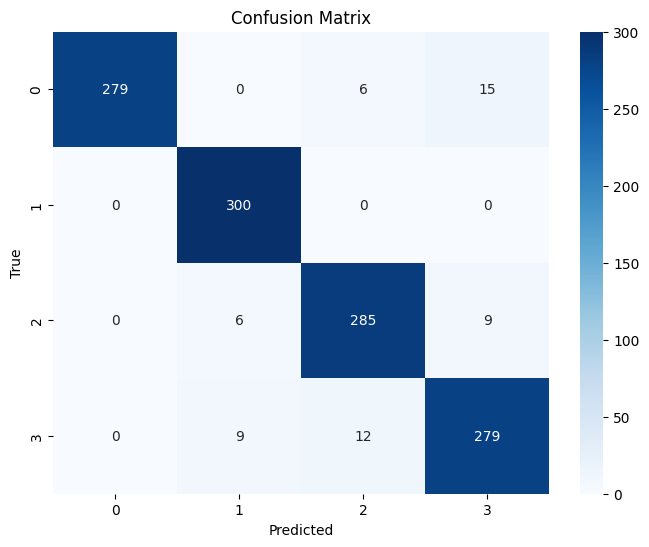

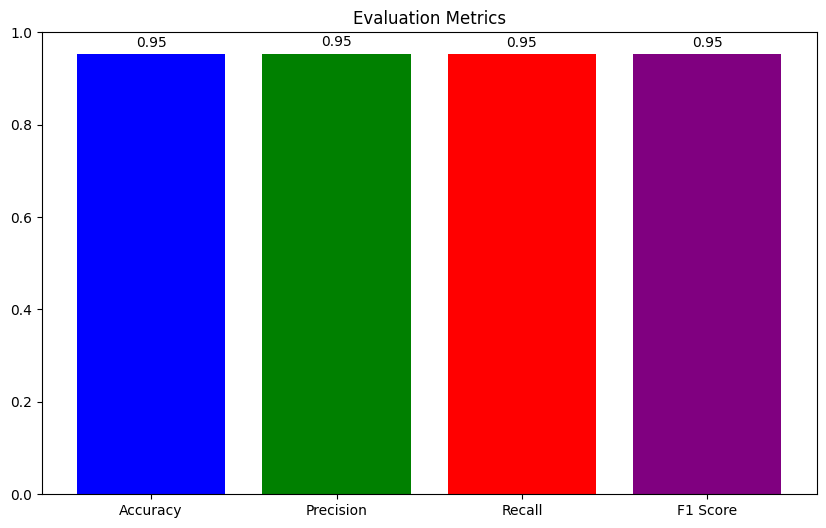


Classification Report:
               precision    recall  f1-score   support

     Class 0       1.00      0.93      0.96       300
     Class 1       0.95      1.00      0.98       300
     Class 2       0.94      0.95      0.95       300
     Class 3       0.92      0.93      0.93       300

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



In [15]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que Y_testes e previsoes já estejam definidos
# Y_testes = np.array([...])
# previsoes = np.array([...])

# Calculando as métricas
accuracy = accuracy_score(Y_testes, previsoes)
precision = precision_score(Y_testes, previsoes, average='macro')
recall = recall_score(Y_testes, previsoes, average='macro')
f1 = f1_score(Y_testes, previsoes, average='macro')

# Imprimindo as métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(Y_testes, previsoes)

# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_testes), yticklabels=np.unique(Y_testes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Gráfico das métricas
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')

# Adicionando os valores a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# Nomes das classes dinamicamente
classes = np.unique(Y_testes)
class_names = [f'Class {cls}' for cls in classes]

# Relatório de classificação completo
report = classification_report(Y_testes, previsoes, target_names=class_names)
print('\nClassification Report:\n', report)


In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que Y_testes e previsoes já estejam definidos
# Y_testes = np.array([...])
# previsoes = np.array([...])

# Calculando as métricas
Y_testes = y_test_0_1
accuracy = accuracy_score(Y_testes, previsoes)
precision = precision_score(Y_testes, previsoes, average='macro')
recall = recall_score(Y_testes, previsoes, average='macro')
f1 = f1_score(Y_testes, previsoes, average='macro')

# Imprimindo as métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Matriz de confusão
conf_matrix = confusion_matrix(Y_testes, previsoes)

# Gráfico da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_testes), yticklabels=np.unique(Y_testes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Gráfico das métricas
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')

# Adicionando os valores a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# Nomes das classes dinamicamente
classes = np.unique(Y_testes)
class_names = [f'Class {cls}' for cls in classes]

# Relatório de classificação completo
report = classification_report(Y_testes, previsoes, target_names=class_names)
print('\nClassification Report:\n', report)


ValueError: Found input variables with inconsistent numbers of samples: [200, 1200]

X shape: (200, 784)


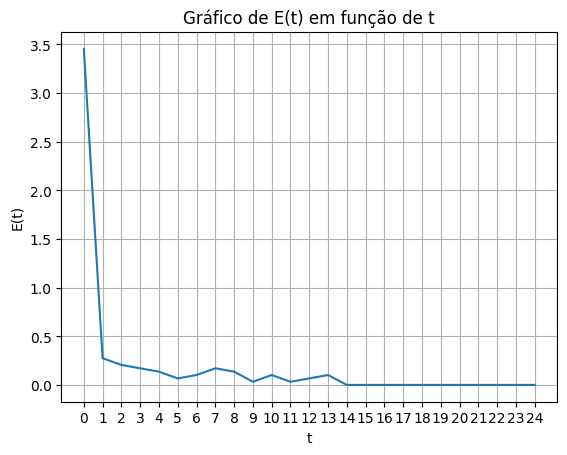

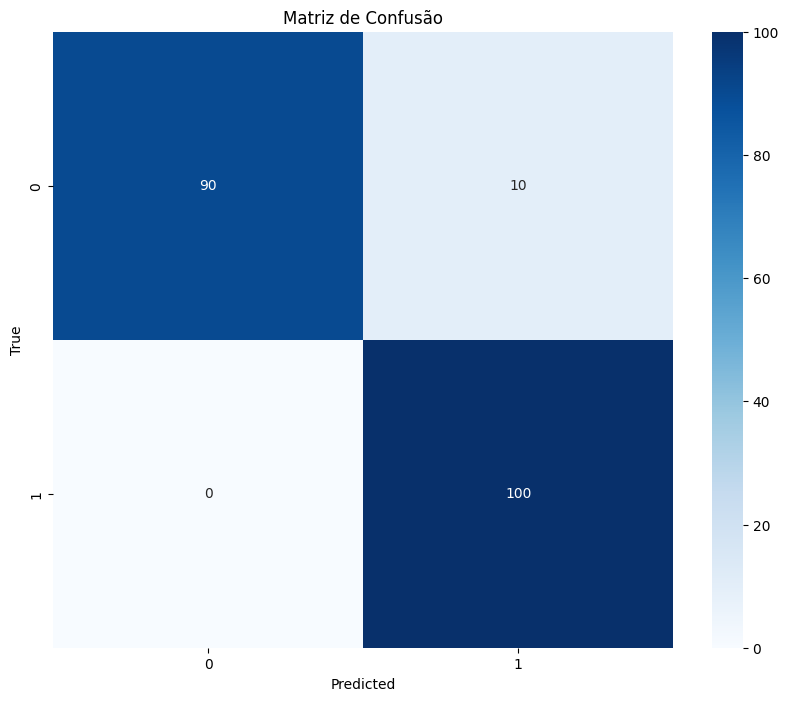

In [ ]:
train_filter = np.where((y_train == 0) | (y_train == 2))
test_filter = np.where((y_test == 0) | (y_test == 2))

x_train_0_2, y_train_0_2 = x_train[train_filter], y_train[train_filter]
x_test_0_2, y_test_0_2 = x_test[test_filter], y_test[test_filter]

x_train_0_2, y_train_0_2 = select_first_n_per_class(x_train_0_2, y_train_0_2, 100)
x_test_0_2, y_test_0_2 = select_first_n_per_class(x_test_0_2, y_test_0_2, 100)

x_train_array = x_train_0_2.reshape((len(x_train_0_2), 784))
x_test_array = x_test_0_2.reshape((len(x_test_0_2), 784))
x_train_0_2 = x_train_array.astype('float32')
x_test_0_2 = x_test_array.astype('float32')

y_train_0_2[y_train_0_2==0]=0
y_train_0_2[y_train_0_2==2]=1
y_test_0_2[y_test_0_2==0]=0
y_test_0_2[y_test_0_2==2]=1
print('X shape:', x_train_0_2.shape)
eta = 0.5
epochs = 500
alpha = np.zeros(len(x_train_0_2))
d=2
batch_size = len(x_train_0_2)
alpha_0_2, E_0_2 = CLogDKPd_MGmB(x_train_0_2, y_train_0_2, alpha, eta, epochs, d, batch_size)
t = list(range(len(E_0_2)))

# Plotando o gráfico
plt.plot(t, E_0_2, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()
A=np.dot(x_test_0_2,x_test_0_2.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train_0_2)):
    p_chapeu = sigmoid(sum(alpha_0_2 * (A[n]) ))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_0_2, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (200, 784)


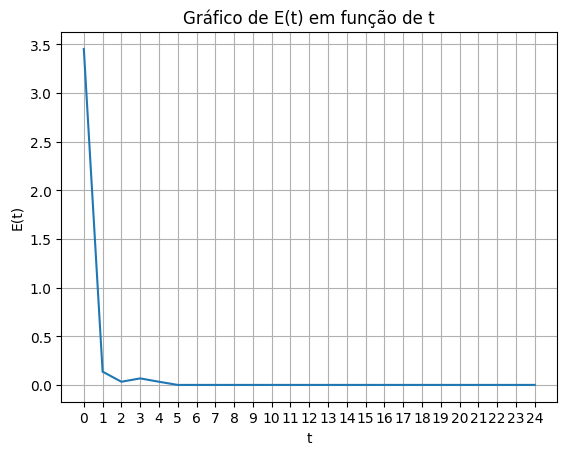

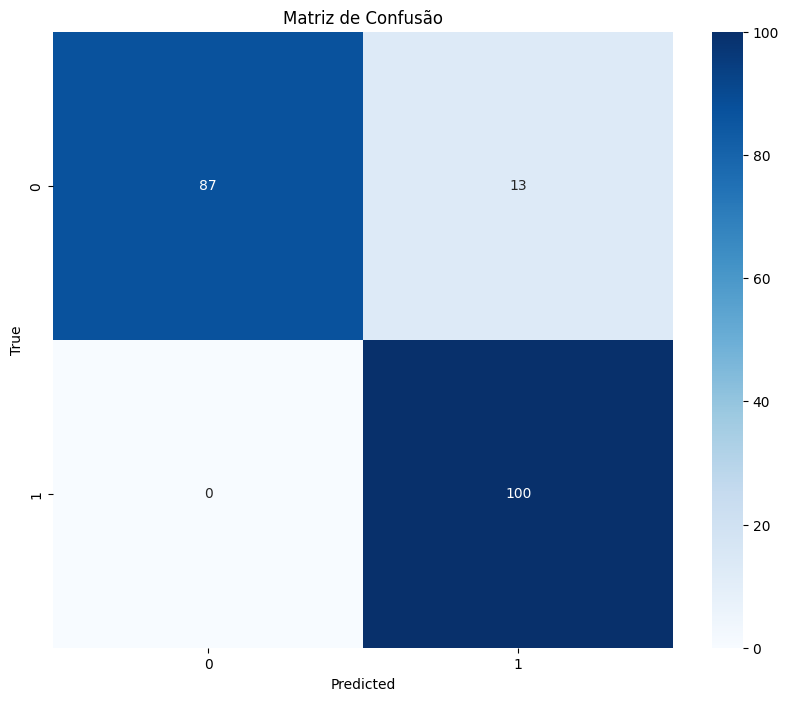

In [ ]:
train_filter = np.where((y_train == 0) | (y_train == 3))
test_filter = np.where((y_test == 0) | (y_test == 3))

x_train_0_3, y_train_0_3 = x_train[train_filter], y_train[train_filter]
x_test_0_3, y_test_0_3 = x_test[test_filter], y_test[test_filter]

x_train_0_3, y_train_0_3 = select_first_n_per_class(x_train_0_3, y_train_0_3, 100)
x_test_0_3, y_test_0_3 = select_first_n_per_class(x_test_0_3, y_test_0_3, 100)

x_train_array = x_train_0_3.reshape((len(x_train_0_3), 784))
x_test_array = x_test_0_3.reshape((len(x_test_0_3), 784))
x_train_0_3 = x_train_array.astype('float32')
x_test_0_3 = x_test_array.astype('float32')

y_train_0_3[y_train_0_3==0]=0
y_train_0_3[y_train_0_3==3]=1
y_test_0_3[y_test_0_3==0]=0
y_test_0_3[y_test_0_3==3]=1
print('X shape:', x_train_0_3.shape)
eta = 0.5
epochs = 500
alpha = np.zeros(len(x_train_0_3))
d=2
batch_size = len(x_train_0_3)
alpha_0_3, E_0_3 = CLogDKPd_MGmB(x_train_0_3, y_train_0_3, alpha, eta, epochs, d, batch_size)
t = list(range(len(E_0_3)))

# Plotando o gráfico
plt.plot(t, E_0_3, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()
A=np.dot(x_test_0_3,x_test_0_3.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train_0_3)):
    p_chapeu = sigmoid(sum(alpha_0_3 * (A[n]) ))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_0_3, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (200, 784)


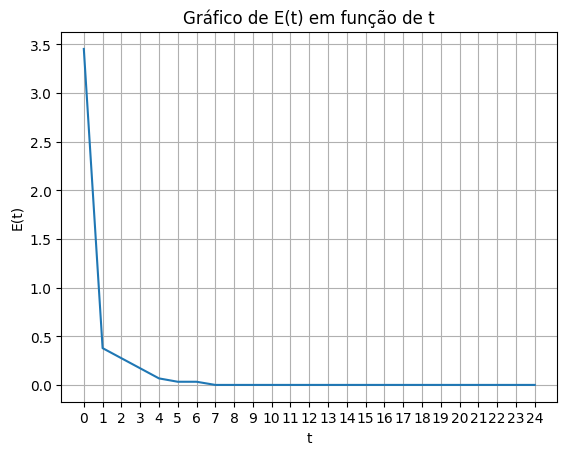

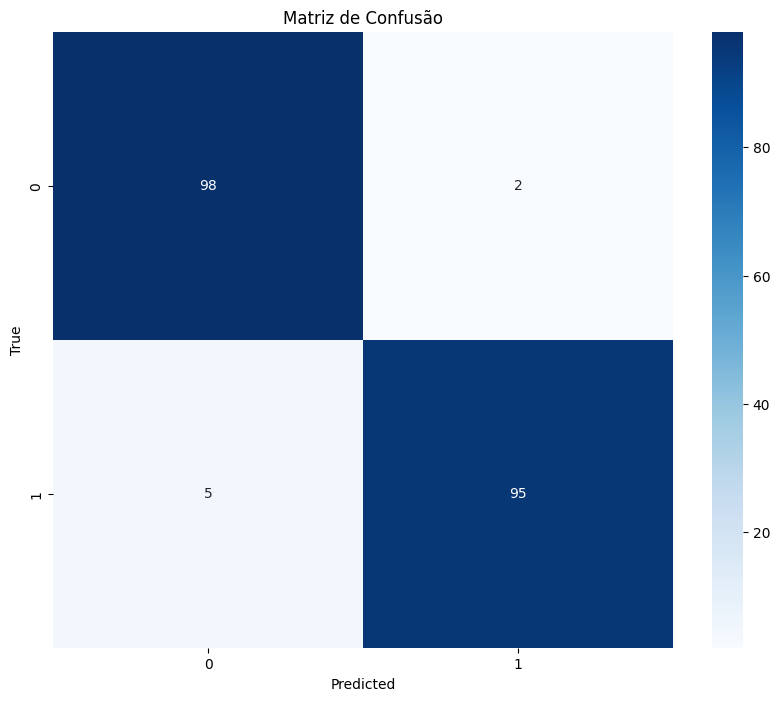

In [ ]:
train_filter = np.where((y_train == 1) | (y_train == 2))
test_filter = np.where((y_test == 1) | (y_test == 2))

x_train_1_2, y_train_1_2 = x_train[train_filter], y_train[train_filter]
x_test_1_2, y_test_1_2 = x_test[test_filter], y_test[test_filter]

x_train_1_2, y_train_1_2 = select_first_n_per_class(x_train_1_2, y_train_1_2, 100)
x_test_1_2, y_test_1_2 = select_first_n_per_class(x_test_1_2, y_test_1_2, 100)

x_train_array = x_train_1_2.reshape((len(x_train_1_2), 784))
x_test_array = x_test_1_2.reshape((len(x_test_1_2), 784))
x_train_1_2 = x_train_array.astype('float32')
x_test_1_2 = x_test_array.astype('float32')

y_train_1_2[y_train_1_2==2]=0
y_train_1_2[y_train_1_2==1]=1
y_test_1_2[y_test_1_2==2]=0
y_test_1_2[y_test_1_2==1]=1
print('X shape:', x_train_1_2.shape)
eta = 0.5
epochs = 500
alpha = np.zeros(len(x_train_1_2))
d=2
batch_size = len(x_train_1_2)
alpha_1_2, E_1_2 = CLogDKPd_MGmB(x_train_1_2, y_train_1_2, alpha, eta, epochs, d, batch_size)
t = list(range(len(E_1_2)))

# Plotando o gráfico
plt.plot(t, E_1_2, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()
A=np.dot(x_test_1_2,x_test_1_2.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train_1_2)):
    p_chapeu = sigmoid(sum(alpha_1_2 * (A[n]) ))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_1_2, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (200, 784)


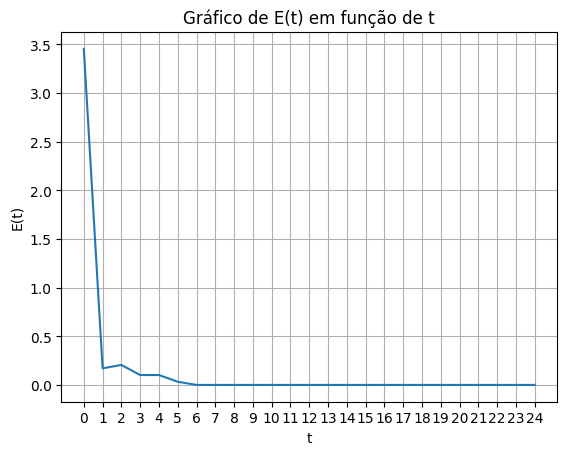

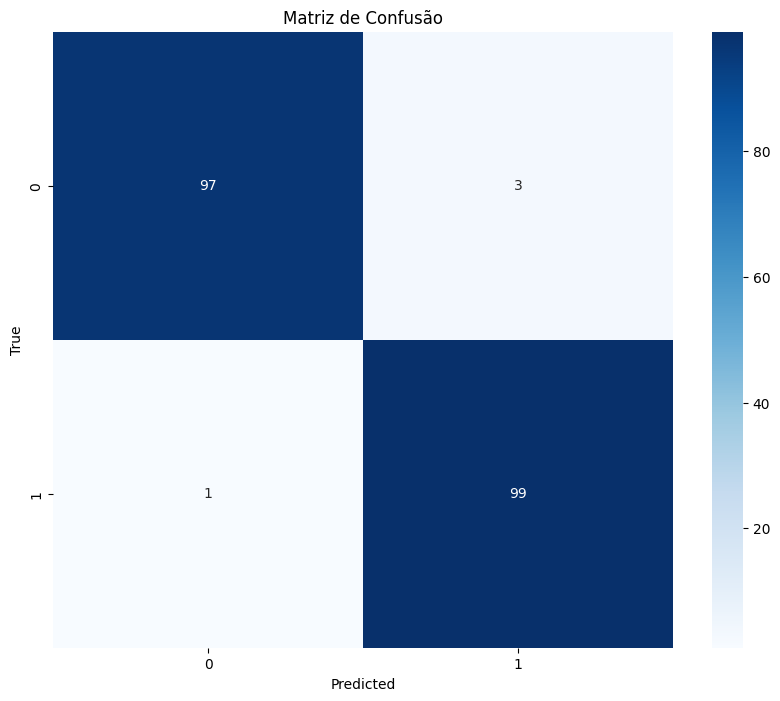

In [ ]:
train_filter = np.where((y_train == 1) | (y_train == 3))
test_filter = np.where((y_test == 1) | (y_test == 3))

x_train_1_3, y_train_1_3 = x_train[train_filter], y_train[train_filter]
x_test_1_3, y_test_1_3 = x_test[test_filter], y_test[test_filter]

x_train_1_3, y_train_1_3 = select_first_n_per_class(x_train_1_3, y_train_1_3, 100)
x_test_1_3, y_test_1_3 = select_first_n_per_class(x_test_1_3, y_test_1_3, 100)

x_train_array = x_train_1_3.reshape((len(x_train_1_3), 784))
x_test_array = x_test_1_3.reshape((len(x_test_1_3), 784))
x_train_1_3 = x_train_array.astype('float32')
x_test_1_3 = x_test_array.astype('float32')

y_train_1_3[y_train_1_3==3]=0
y_train_1_3[y_train_1_3==1]=1
y_test_1_3[y_test_1_3==3]=0
y_test_1_3[y_test_1_3==1]=1
print('X shape:', x_train_1_3.shape)
eta = 0.5
epochs = 500
alpha = np.zeros(len(x_train_1_3))
d=2
batch_size = len(x_train_1_3)
alpha_1_3, E_1_3 = CLogDKPd_MGmB(x_train_1_3, y_train_1_3, alpha, eta, epochs, d, batch_size)
t = list(range(len(E_1_3)))

# Plotando o gráfico
plt.plot(t, E_1_3, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()
A=np.dot(x_test_1_3,x_test_1_3.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train_1_3)):
    p_chapeu = sigmoid(sum(alpha_1_3 * (A[n]) ))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_1_3, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

X shape: (200, 784)


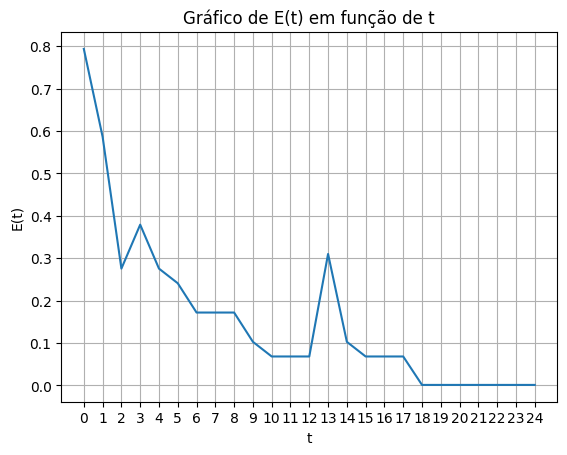

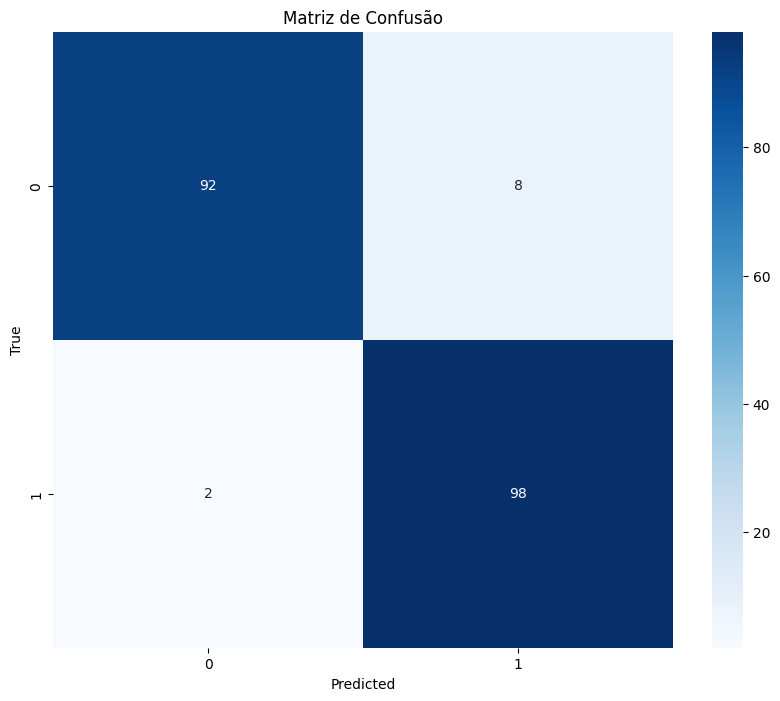

In [ ]:
train_filter = np.where((y_train == 2) | (y_train == 3))
test_filter = np.where((y_test == 2) | (y_test == 3))

x_train_2_3, y_train_2_3 = x_train[train_filter], y_train[train_filter]
x_test_2_3, y_test_2_3 = x_test[test_filter], y_test[test_filter]

x_train_2_3, y_train_2_3 = select_first_n_per_class(x_train_2_3, y_train_2_3, 100)
x_test_2_3, y_test_2_3 = select_first_n_per_class(x_test_2_3, y_test_2_3, 100)

x_train_array = x_train_2_3.reshape((len(x_train_2_3), 784))
x_test_array = x_test_2_3.reshape((len(x_test_2_3), 784))
x_train_2_3 = x_train_array.astype('float32')
x_test_2_3 = x_test_array.astype('float32')

y_train_2_3[y_train_2_3==2]=0
y_train_2_3[y_train_2_3==3]=1
y_test_2_3[y_test_2_3==2]=0
y_test_2_3[y_test_2_3==3]=1
print('X shape:', x_train_2_3.shape)
eta = 0.5
epochs = 500
alpha = np.zeros(len(x_train_2_3))
d=2
batch_size = len(x_train_2_3)
alpha_2_3, E_2_3 = CLogDKPd_MGmB(x_train_2_3, y_train_2_3, alpha, eta, epochs, d, batch_size)
t = list(range(len(E_2_3)))

# Plotando o gráfico
plt.plot(t, E_2_3, linestyle='-')
plt.xticks(t)

# Configurações adicionais do gráfico
plt.xlabel('t')
plt.ylabel('E(t)')
plt.title('Gráfico de E(t) em função de t')
plt.grid(True)

# Exibindo o gráfico
plt.show()
A=np.dot(x_test_2_3,x_test_2_3.T)
A=A**d
y_chapeu_all = []
for n in range(len(x_train_2_3)):
    p_chapeu = sigmoid(sum(alpha_2_3 * (A[n]) ))
    #print(p_chapeu)   print(sinal(p_chapeu))
    y_chapeu_all.append(threshold(p_chapeu))
cm_fc = confusion_matrix(y_true=y_test_2_3, y_pred=y_chapeu_all)
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Relacionando o Alpha com w til
w_0_1 = np.array((784))
for l in range(len(x_train_0_1)):
    w_0_1 = w_0_1 + alpha_0_1[l]*x_train_0_1[l]
w_0_2 = np.array((784))
for l in range(len(x_train_0_2)):
    w_0_2 = w_0_2 + alpha_0_2[l]*x_train_0_2[l]
w_0_3 = np.array((784))
for l in range(len(x_train_0_3)):
    w_0_3 = w_0_3 + alpha_0_3[l]*x_train_0_3[l]
w_1_2 = np.array((784))
for l in range(len(x_train_1_2)):
    w_1_2 = w_1_2 + alpha_1_2[l]*x_train_1_2[l]
w_1_3 = np.array((784))
for l in range(len(x_train_1_3)):
    w_1_3 = w_1_3 + alpha_1_3[l]*x_train_1_3[l]
w_2_3 = np.array((784))
for l in range(len(x_train_2_3)):
    w_2_3 = w_2_3 + alpha_2_3[l]*x_train_2_3[l] 

In [ ]:
dataset_x = x_test_0_3
dataset_y = y_test_0_3
for i in range(len(dataset_x)):
    # Initialize the score list
    pontuacao = [0, 0, 0, 0]
    
    # Select the element from the test set
    elemento = dataset_x[i]
    
    # Calculate predictions
    previsao_0_1 = threshold(sigmoid(np.dot(w_0_1, elemento)))
    previsao_0_2 = threshold(sigmoid(np.dot(w_0_2, elemento)))
    previsao_0_3 = threshold(sigmoid(np.dot(w_0_3, elemento)))
    previsao_1_2 = threshold(sigmoid(np.dot(w_1_2, elemento)))
    previsao_1_3 = threshold(sigmoid(np.dot(w_1_3, elemento)))
    previsao_2_3 = threshold(sigmoid(np.dot(w_2_3, elemento)))

    # Update scores based on predictions
    if previsao_0_1 == 0:
        pontuacao[0] += 1
    if previsao_0_2 == 0:
        pontuacao[0] += 1
    if previsao_0_3 == 0:
        pontuacao[0] += 1

    if previsao_0_1 == 1:
        pontuacao[1] += 1
    if previsao_1_2 == 1:
        pontuacao[1] += 1
    if previsao_1_3 == 1:
        pontuacao[1] += 1

    if previsao_1_2 == 0:
        pontuacao[2] += 1
    if previsao_0_2 == 1:
        pontuacao[2] += 1
    if previsao_2_3 == 0:
        pontuacao[2] += 1

    if previsao_0_3 == 1:
        pontuacao[3] += 1
    if previsao_1_3 == 0:
        pontuacao[3] += 1
    if previsao_2_3 == 1:
        pontuacao[3] += 1

    # Determine the class with the highest score
    predicted_class = np.argmax(pontuacao)
    if predicted_class == dataset_y[i]:
        print("Acertou")
    else:
        print("Errou")
  


Acertou
Errou
Acertou
Errou
Errou
Errou
Errou
Errou
Acertou
Errou
Errou
Acertou
Acertou
Errou
Acertou
Acertou
Errou
Errou
Errou
Acertou
Errou
Errou
Acertou
Errou
Errou
Errou
Acertou
Errou
Acertou
Errou
Errou
Errou
Errou
Errou
Errou
Errou
Acertou
Errou
Errou
Errou
Errou
Errou
Errou
Acertou
Errou
Errou
Errou
Errou
Errou
Errou
Errou
Acertou
Errou
Errou
Errou
Acertou
Errou
Errou
Errou
Errou
Acertou
Acertou
Errou
Acertou
Errou
Errou
Acertou
Errou
Errou
Acertou
Errou
Errou
Acertou
Acertou
Errou
Acertou
Errou
Errou
Errou
Errou
Errou
Acertou
Acertou
Errou
Acertou
Errou
Errou
Acertou
Errou
Acertou
Acertou
Errou
Errou
Acertou
Errou
Errou
Acertou
Errou
Errou
Errou
Acertou
Acertou
Errou
Acertou
Acertou
Errou
Acertou
Acertou
Errou
Errou
Acertou
Acertou
Errou
Acertou
Acertou
Acertou
Acertou
Errou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Errou
Acertou
Errou
Acertou
Acertou
Acertou
Errou
Errou
Errou
Acertou
Acertou
Acertou
Errou
Acertou
Acertou
Acertou
Acertou
Acertou
Acertou
Ac

[0, 1, 1, 1]

In [ ]:
threshold(sigmoid(np.dot(w_0_1,x_train_0_1[0])))


0